# MNIST for Hand Gesture_Explore Clustering_Techniques 

MNIST Hand Gesture Image data set is a handwritten digits which is popular benchmark for Image-base machine learning methods. The MNIST Data is presented in a .CSV format with labels and pixel values in single rows. 
The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).
The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). 

The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2....pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.


k-means clustering is a method of vector quantization, that is popular for cluster analysis in data mining. 
k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.

Firstly we will explore K means clustering algorithms listed below for the training data set.
1. Hartigan-Wong 
2. Lloyd
3. Forgy
4. MacQueen

Here are the sequence of steps to process training data using K-Means clustering:
1. Import / read data 
2. Review and understand Mnist Sign data set
3. Preprocess data (Scaling and centering data )
4. Use Different clustering techniques to measure performance
5. Conclusion



## Importowanie bibliotek

In [12]:
#citation(mclust)
library(vcd)   
library(readr)  
library(mclust)
library(dplyr)  
library(caret)    
library(ggplot2) 
library(cluster) 
library(NbClust) 
library(tidyverse) 
library(factoextra)

## Importowanie danych

[1] "amer_sign2.png"             "amer_sign3.png"            
[3] "american_sign_language.PNG" "sign_mnist_test"           
[5] "sign_mnist_test.csv"        "sign_mnist_train"          
[7] "sign_mnist_train.csv"

Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.


[1] 27455   785

[1] 255

[1] 0

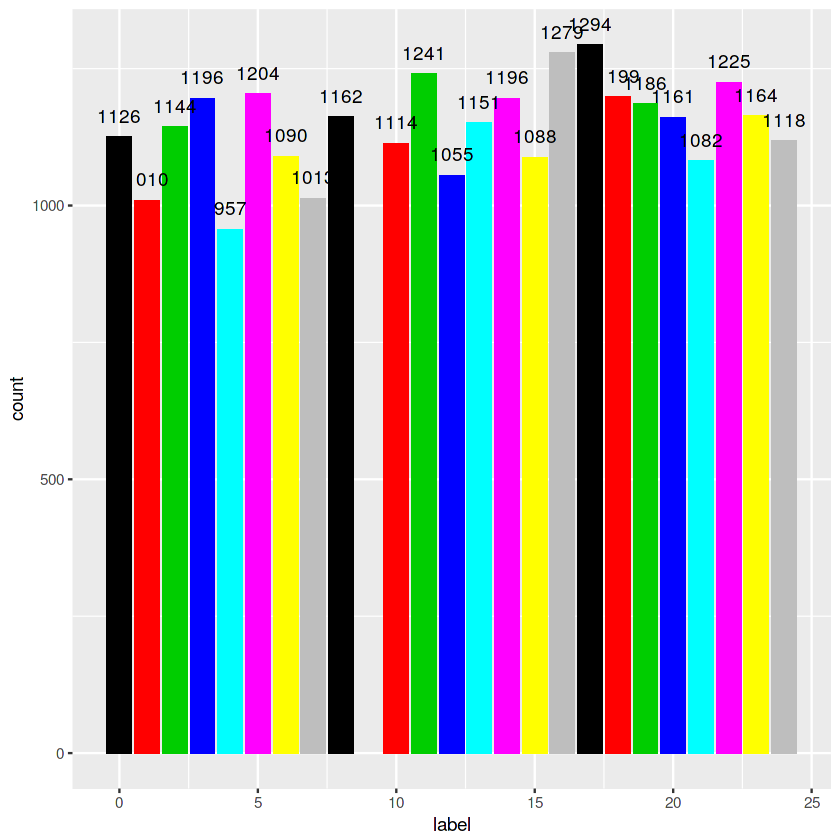

In [13]:
list.files(path = "../input")
sign_mnist<-read_csv("../input/sign_mnist_train.csv")

# Wymiary zestawu danych
dim(sign_mnist)
# Maxymalna wartość danych
max(sign_mnist)
# Minimalna wartość danych
min(sign_mnist)

# Wykres liczby punktów danych dla każdego znaku alfabetu dostępnego w zestawie danych.
ggplot(data=sign_mnist, aes(x=label))+geom_bar(fill= c(1:24))  +geom_text(stat='count', aes(label=..count..),vjust = -1)





[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

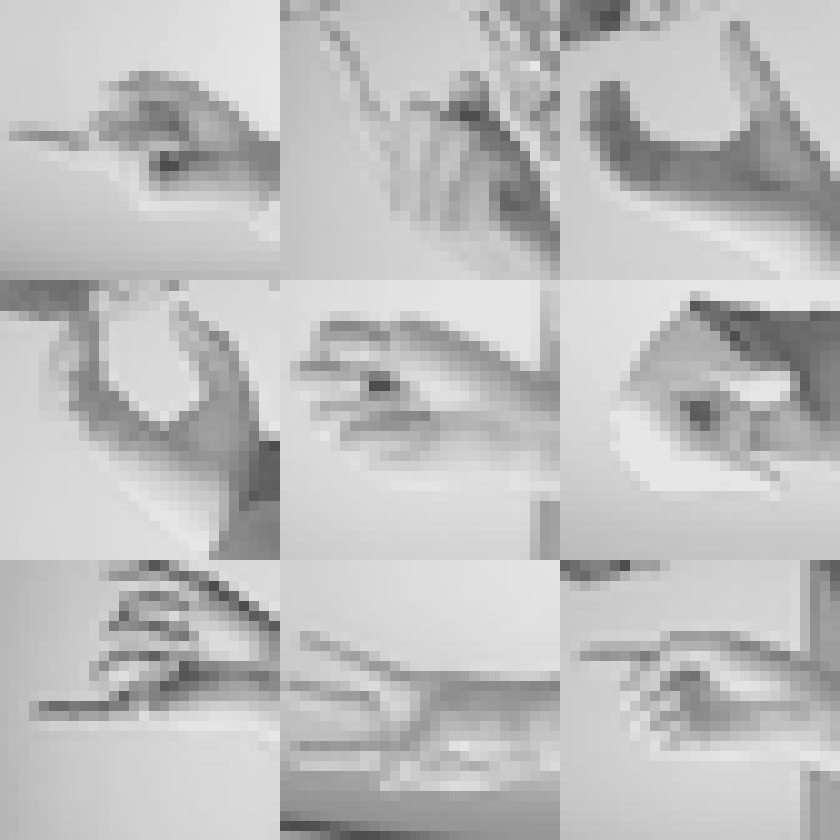

In [14]:
# Utwórzenie okno grafiki
 
par(mfrow=c(3,3), mar = rep(0, 4)) 

lapply(1:9, 
       function(x) image(
         matrix(unlist(sign_mnist[x,-1]),ncol = 28,byrow = T),
         col=grey.colors(255),    # Select 255 grey levels
         axes = FALSE
       )
)

In [15]:
# Skalowanie danych

# minimalne i maksymalne wartości zestawu danych mieszczą się w zakresie od 0 do 255, dlatego przeskalujemy dane (od 0 do 1 ), dzieląc wartości każdego piksela/koloru przez 255 (wartość maksymalna) i utworzymy zestaw danych modelu. 
# Podczas skalowania zestawu danych musimy wykluczyć kolumnę etykiety
model_data<-sign_mnist[,-1]/255
head(model_data)
# widać, że wszystkie wartości pikseli / kolorów zestawu danych są skalowane, a wartości Min i Max danych modelu wynoszą 0 i 1
min(model_data)
max(model_data)

pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7   
1 0.4196078 0.4627451 0.4980392 0.5254902 0.5450980 0.5607843 0.5725490
2 0.6078431 0.6156863 0.6117647 0.6117647 0.6117647 0.6156863 0.6117647
3 0.7333333 0.7372549 0.7372549 0.7333333 0.7333333 0.7294118 0.7333333
4 0.8274510 0.8274510 0.8313725 0.8313725 0.8274510 0.8235294 0.8274510
5 0.6431373 0.6549020 0.6666667 0.6745098 0.6901961 0.7019608 0.7058824
6 0.6313725 0.6588235 0.6745098 0.6784314 0.6980392 0.7215686 0.7411765
  pixel8    pixel9    pixel10   ⋯ pixel775  pixel776  pixel777  pixel778 
1 0.5882353 0.6000000 0.6117647 ⋯ 0.8117647 0.8117647 0.8117647 0.8117647
2 0.6196078 0.6196078 0.6156863 ⋯ 0.2705882 0.5843137 0.5019608 0.3411765
3 0.7372549 0.7333333 0.7294118 ⋯ 0.7921569 0.7882353 0.7843137 0.7803922
4 0.8235294 0.8235294 0.8274510 ⋯ 0.9215686 0.9176471 0.9137255 0.9058824
5 0.7215686 0.7254902 0.7294118 ⋯ 0.3607843 0.4117647 0.4117647 0.4235294
6 0.7568627 0.7686275 0.7921569 ⋯ 0.2980392 0.2901961 0.2666667 0.2431373
  pixel779  pixel780  pixel781  pixel782  pixel783  pixel784 
1 0.8078431 0.8078431 0.8078431 0.8000000 0.7960784 0.7921569
2 0.3686275 0.6392157 0.6862745 0.4039216 0.5294118 0.5843137
3 0.7764706 0.7803922 0.7764706 0.7647059 0.7607843 0.7647059
4 0.9019608 0.8862745 0.8823529 0.8705882 0.8980392 0.6392157
5 0.5215686 0.6392157 0.6156863 0.6392157 0.6431373 0.7019608
6 0.2078431 0.2156863 0.1882353 0.9333333 1.0000000 1.0000000

[1] 0

[1] 1

### Algorytm Hartigan-Wong

In [16]:
# Dla porównania jest liczony czas przetwarzania 
start.time <- Sys.time()
hwong_cl<-kmeans(model_data, centers = 24, nstart = 10, iter.max = 500, algorithm ="Hartigan-Wong")
Sys.time() - start.time

hwong_df<-data.frame(predicted = hwong_cl$cluster, actual = sign_mnist$label)
head(hwong_df)

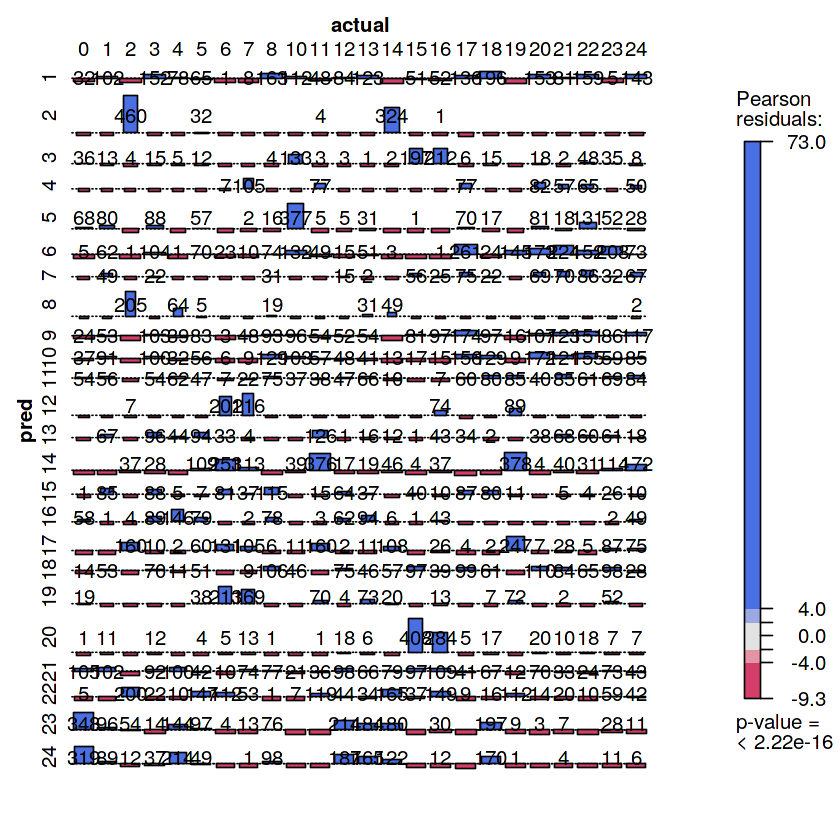

In [18]:
# Wykres powiązania, aby zobaczyć powiązanie między przewidywanymi a rzeczywistymi wartościami
hwong_tb<-table(pred=hwong_df$predicted,actual=hwong_df$actual)
assoc(hwong_tb, shade = T, labeling = labeling_values)


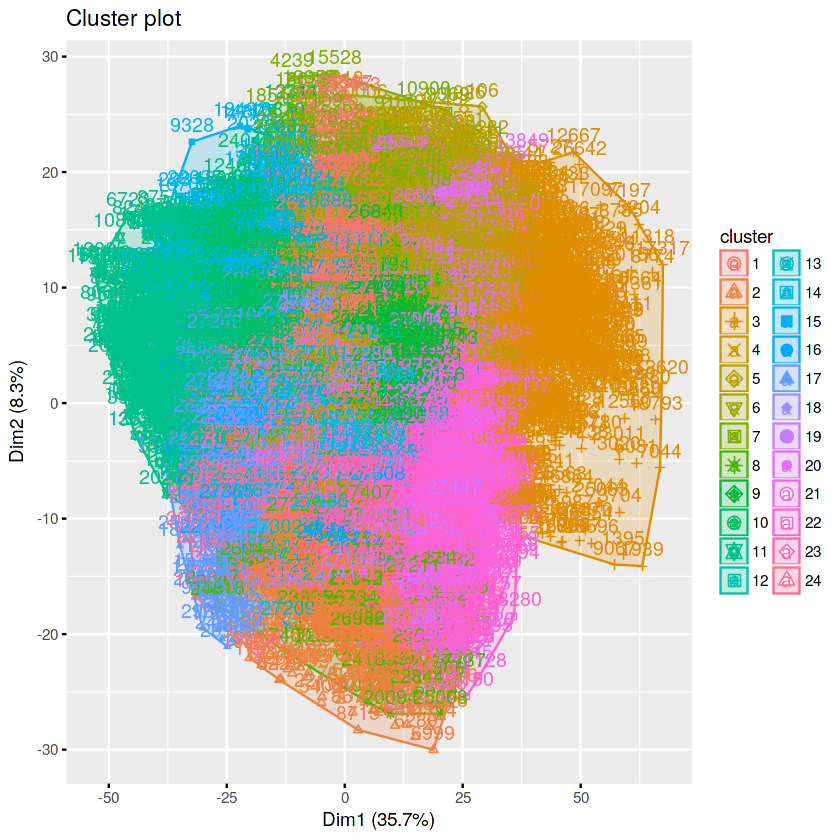

In [19]:
fviz_cluster(hwong_cl, data = sign_mnist)

### Algorytm Lloyd 

In [20]:
# Dla porównania jest liczony czas przetwarzania 

start.time <- Sys.time()
Lloyd_cl<-kmeans(model_data, centers = 24, nstart = 10, iter.max = 500, algorithm ="Lloyd")
Sys.time() - start.time

Time difference of 13.73073 mins

In [21]:
Lloyd_df<-data.frame(predicted = Lloyd_cl$cluster, actual = sign_mnist$label)
head(Lloyd_df)

predicted actual
1 10         3    
2 10         6    
3 15         2    
4 22         2    
5  5        13    
6 17        16

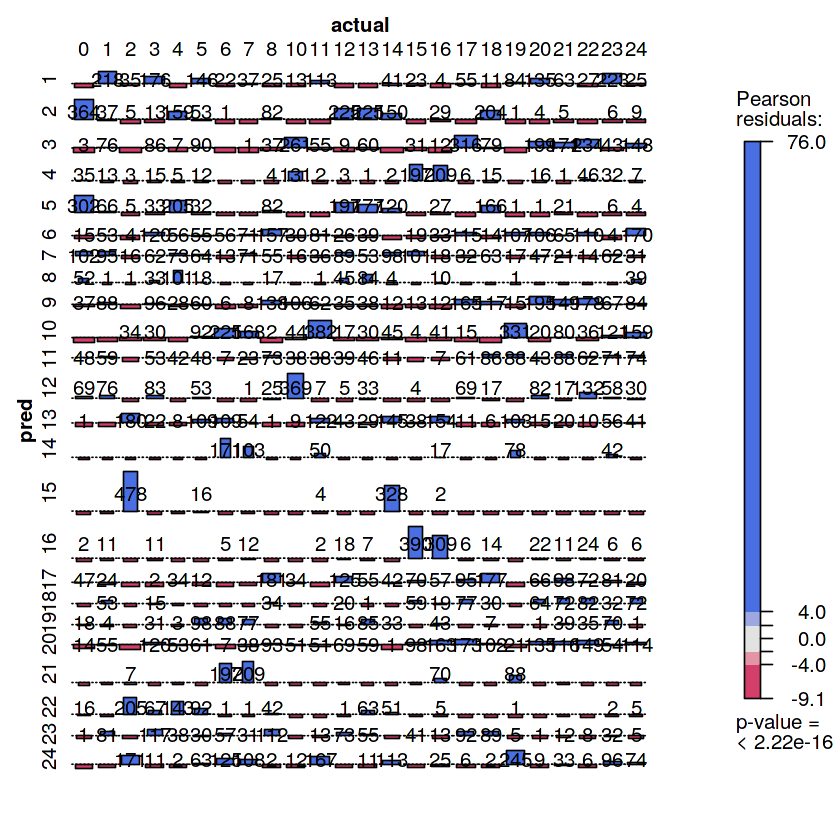

In [22]:
# Wykres powiązania, aby zobaczyć powiązanie między przewidywanymi a rzeczywistymi wartościami
Lloyd_tb<-table(pred=Lloyd_df$predicted,actual=Lloyd_df$actual)
assoc(Lloyd_tb, shade = T, labeling = labeling_values)

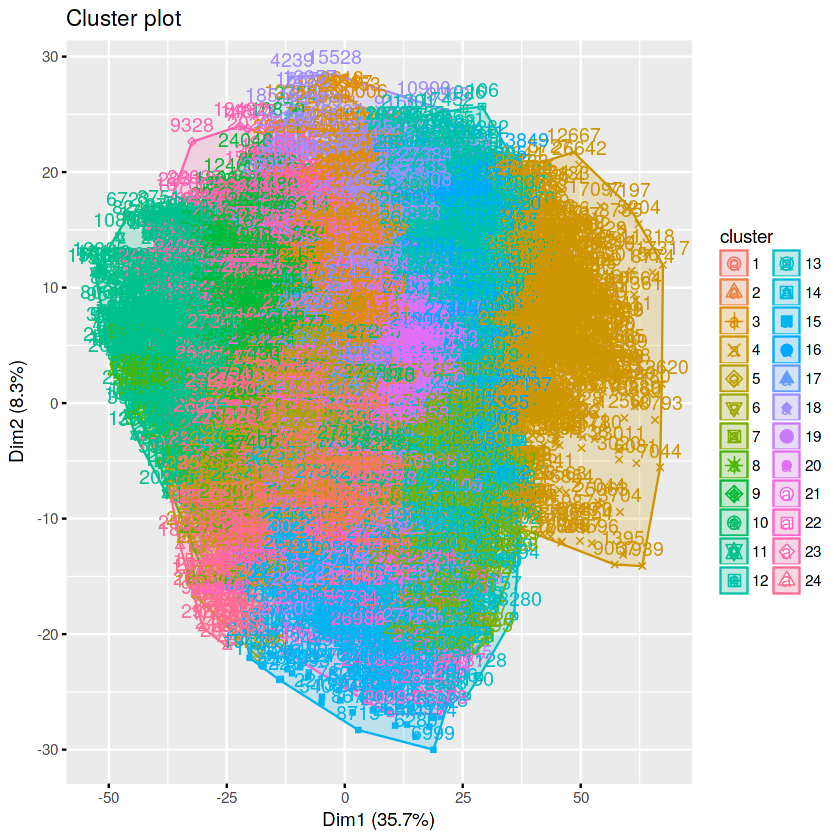

In [23]:
fviz_cluster(Lloyd_cl, data = sign_mnist)

### Algorytm Forgy

In [24]:
# Dla porównania jest liczony czas przetwarzania 

start.time <- Sys.time()
Forgy_cl<-kmeans(model_data, centers = 24, nstart = 10, iter.max = 500, algorithm ="Forgy")
Sys.time() - start.time

Time difference of 13.62808 mins

In [25]:
Forgy_df<-data.frame(predicted = Forgy_cl$cluster, actual = sign_mnist$label)
head(Forgy_df)

predicted actual
1 10         3    
2 10         6    
3 15         2    
4 22         2    
5  5        13    
6 17        16

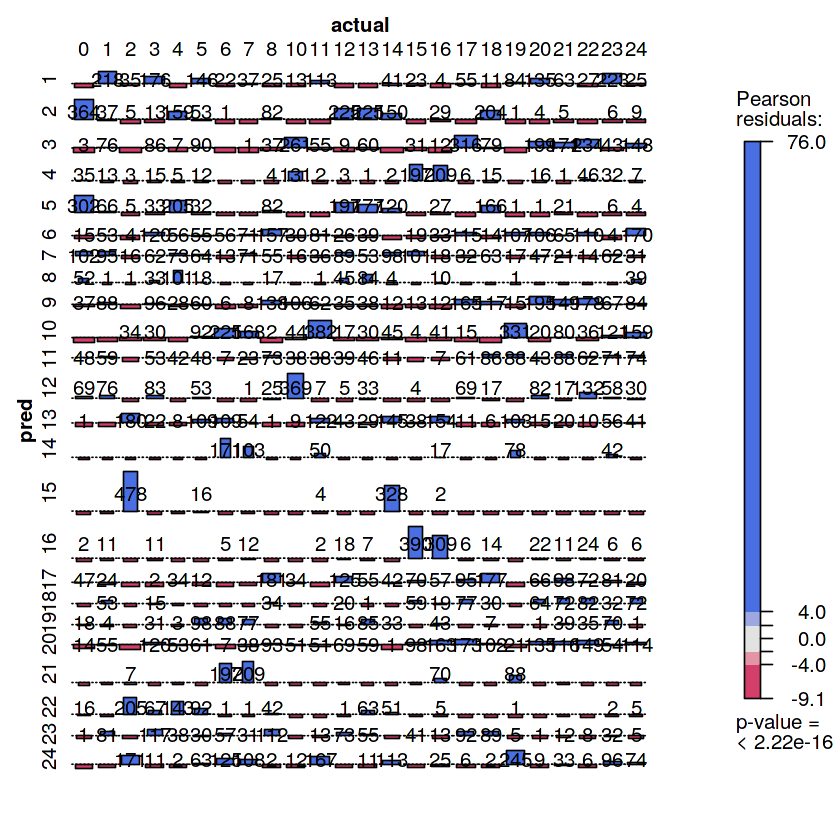

In [26]:
# Wykres powiązania, aby zobaczyć powiązanie między przewidywanymi a rzeczywistymi wartościami

Forgy_tb<-table(pred=Forgy_df$predicted,actual=Forgy_df$actual)
assoc(Forgy_tb, shade = T, labeling = labeling_values)


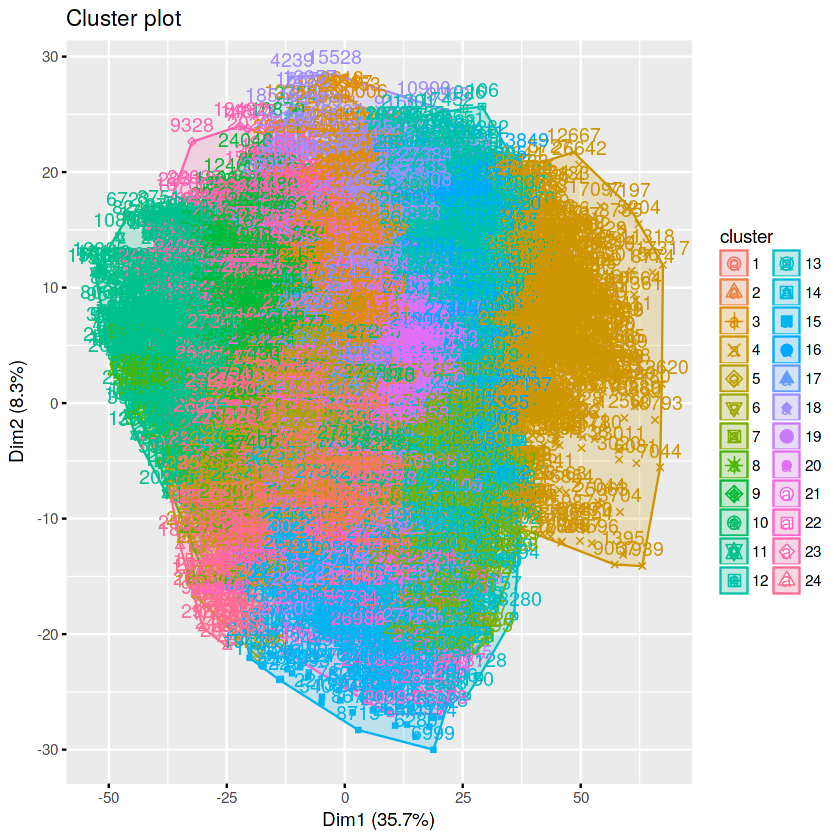

In [27]:
fviz_cluster(Forgy_cl, data = sign_mnist)

### Algorytm MacQueen

In [28]:
# Dla porównania jest liczony czas przetwarzania 

start.time <- Sys.time()
MacQueen_cl<-kmeans(model_data, centers = 24, nstart = 10, iter.max = 500, algorithm ="MacQueen")
Sys.time() - start.time

Time difference of 7.436914 mins

In [29]:
MacQueen_df<-data.frame(predicted = MacQueen_cl$cluster, actual = sign_mnist$label)
head(MacQueen_df)

predicted actual
1  7         3    
2  7         6    
3 12         2    
4 17         2    
5 24        13    
6 19        16

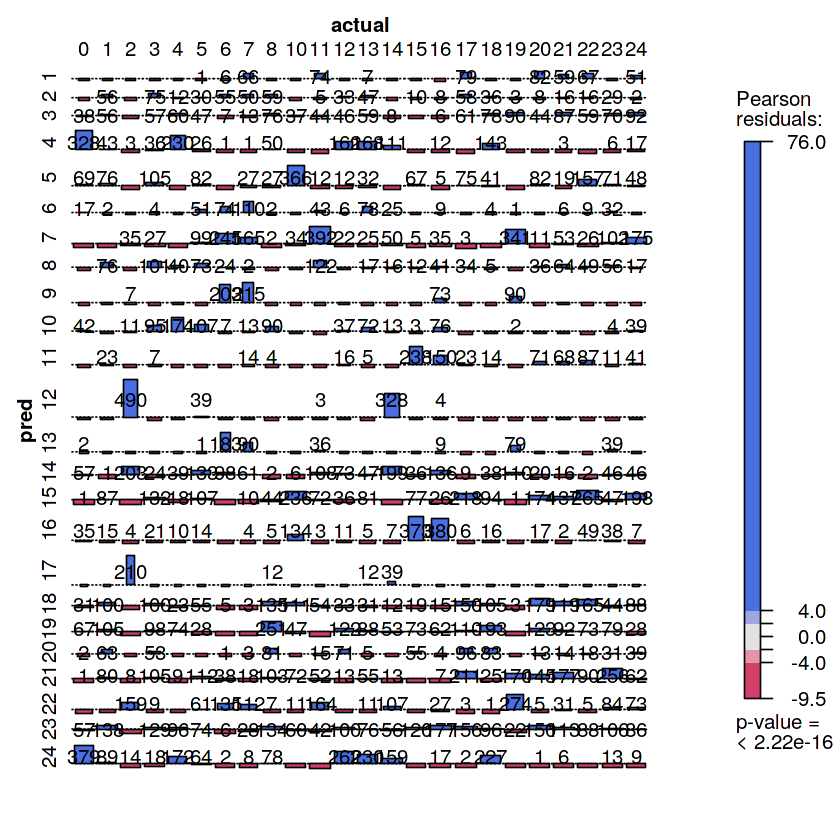

In [30]:
# Wykres powiązania, aby zobaczyć powiązanie między przewidywanymi a rzeczywistymi wartościami

MacQueen_tb<-table(pred=MacQueen_df$predicted,actual=MacQueen_df$actual)
assoc(MacQueen_tb, shade = T, labeling = labeling_values)

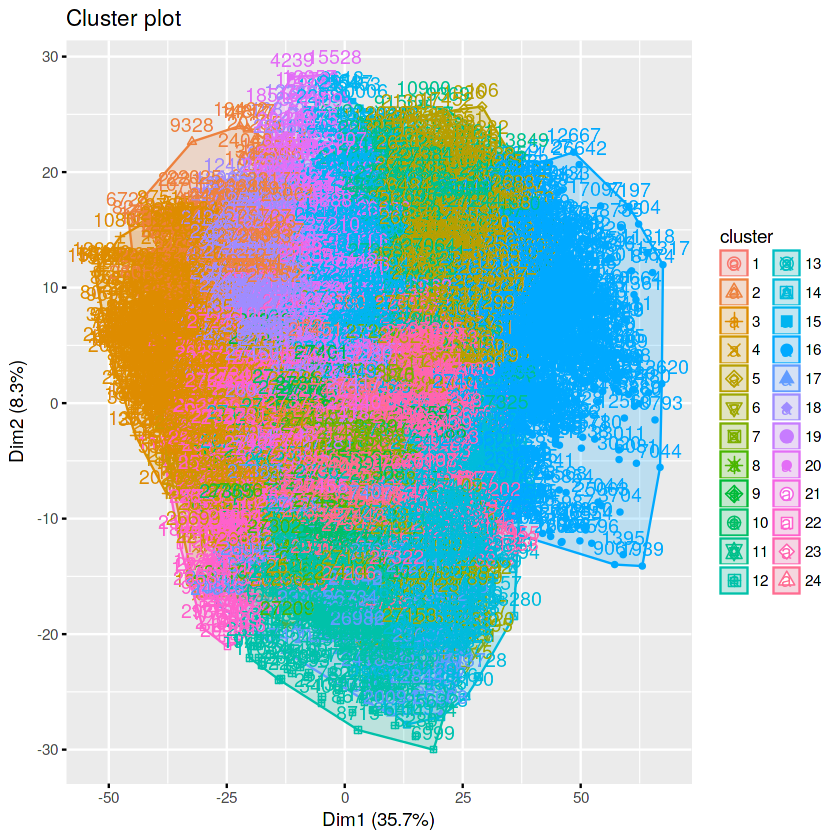

In [31]:
fviz_cluster(MacQueen_cl, data = sign_mnist)

### Porównanie wyników każego algorytmu

In [32]:
actual_sign_values <-sign_mnist%>%group_by(label )%>% count()
actual_sign_values<- cbind(actual_sign_values$label,  actual_sign_values$n, 
                           data.frame(hwong_cl$size), data.frame(Lloyd_cl$size), data.frame(Forgy_cl$size), data.frame(MacQueen_cl$size))



Act_Pred_df<-data.frame(labels = actual_sign_values$`actual_sign_values$label`, actual = actual_sign_values$`actual_sign_values$n`
                    , predicted_hwong = actual_sign_values$hwong_cl.size
                    , predicted_Lloyd = actual_sign_values$Lloyd_cl.size
                    , predicted_Forgy = actual_sign_values$Forgy_cl.size
                    , predicted_MacQueen = actual_sign_values$MacQueen_cl.size)

Act_Pred_df

labels actual predicted_hwong predicted_Lloyd predicted_Forgy
1   0     1126   1944            1476            1476           
2   1     1010    821            1572            1572           
3   2     1144    772            1918            1918           
4   3     1196    520             755             755           
5   4      957   1127            1445            1445           
6   5     1204   1861            1506            1506           
7   6     1090    621            1249            1249           
8   7     1013    375             407             407           
9   8     1162   1751            1709            1709           
10 10     1114   1640            1876            1876           
11 11     1241   1146            1105            1105           
12 12     1055    587            1130            1130           
13 13     1151    818            1286            1286           
14 14     1196   1817             461             461           
15 15     1088    808             828             828           
16 16     1279    717             856             856           
17 17     1294   1247            1292            1292           
18 18     1199   1219             630             630           
19 19     1186    752             704             704           
20 20     1161    848            1797            1797           
21 21     1082   1471             571             571           
22 22     1225   1387             695             695           
23 23     1164   1709             906             906           
24 24     1118   1497            1281            1281           
   predicted_MacQueen
1   492              
2   608              
3  1135              
4  1340              
5  1373              
6   473              
7  1847              
8   785              
9   588              
10  785              
11  772              
12  864              
13  439              
14 1510              
15 2061              
16 1156              
17  273              
18 1580              
19 1766              
20  647              
21 1822              
22 1279              
23 2110              
24 1750

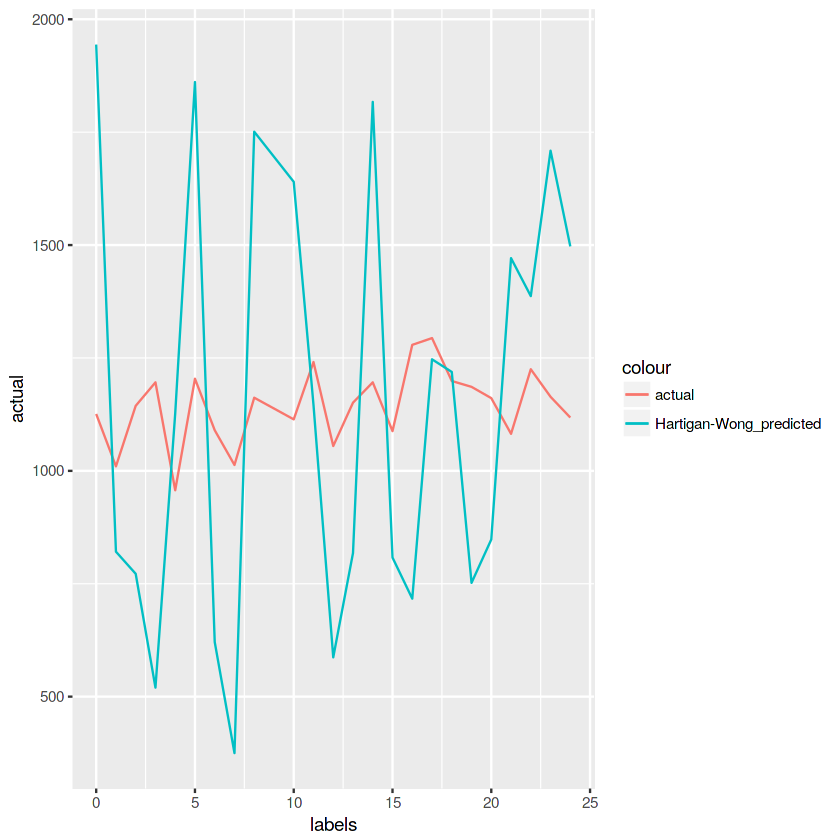

In [33]:
# Wykres zgodności algorytmu Hartigan-Wong

ggplot(Act_Pred_df, aes(labels)) + 
    geom_line(aes(y = actual, colour = "actual")) + 
  geom_line(aes(y = predicted_hwong, colour = "Hartigan-Wong_predicted"))

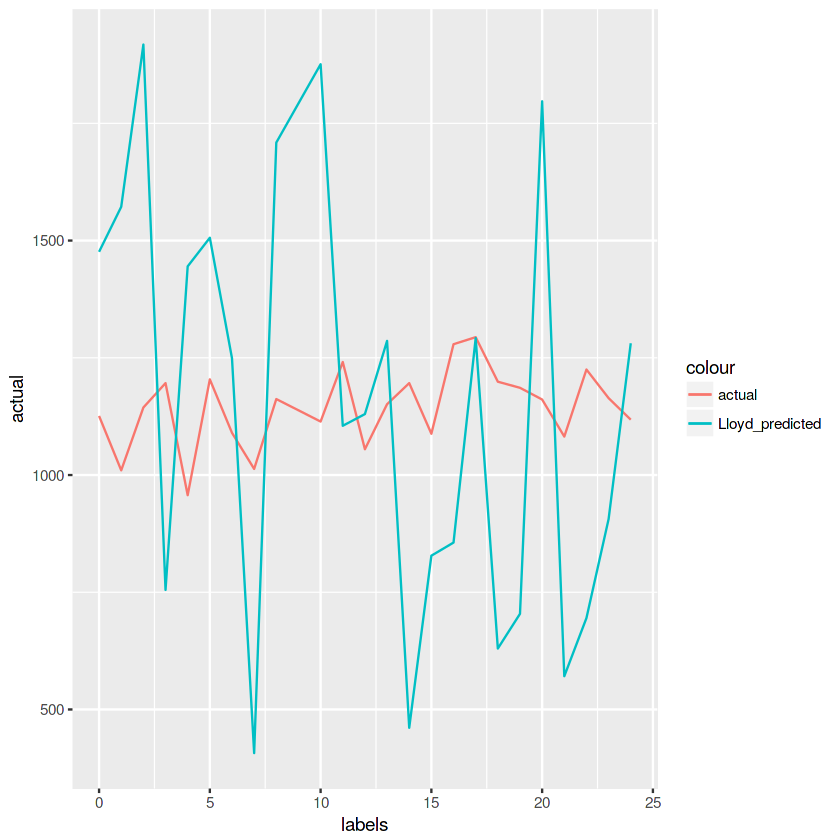

In [34]:
# Wykres zgodności algorytmu Lloyd

ggplot(Act_Pred_df, aes(labels)) + 
    geom_line(aes(y = actual, colour = "actual")) + 
  geom_line(aes(y = predicted_Lloyd, colour = "Lloyd_predicted"))

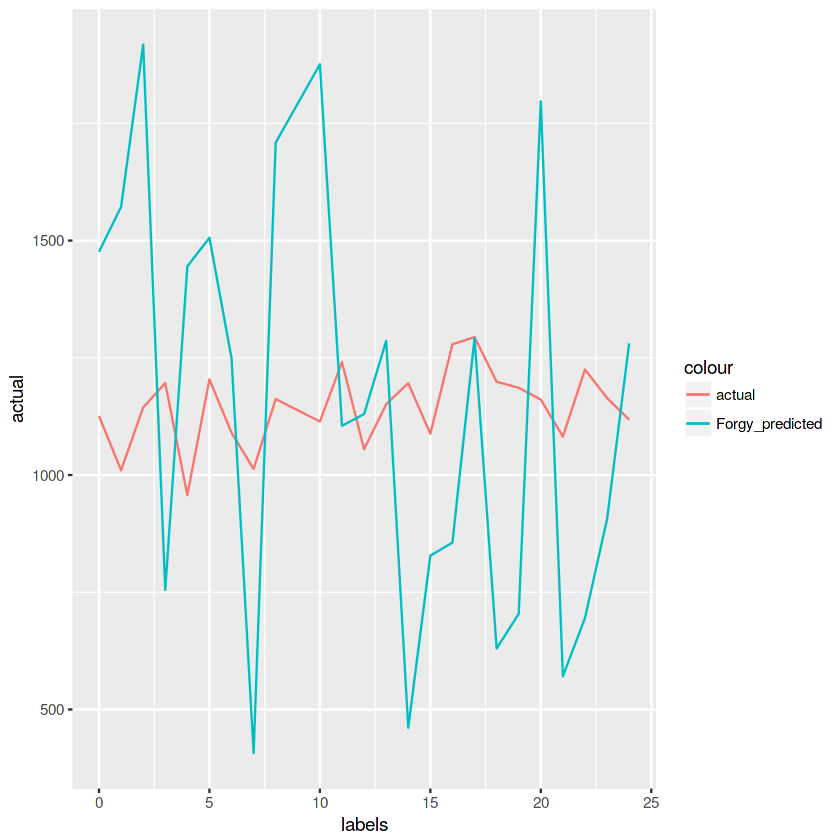

In [35]:
# Wykres zgodności algorytmu Forgy

ggplot(Act_Pred_df, aes(labels)) + 
    geom_line(aes(y = actual, colour = "actual")) + 
  geom_line(aes(y = predicted_Forgy, colour = "Forgy_predicted"))

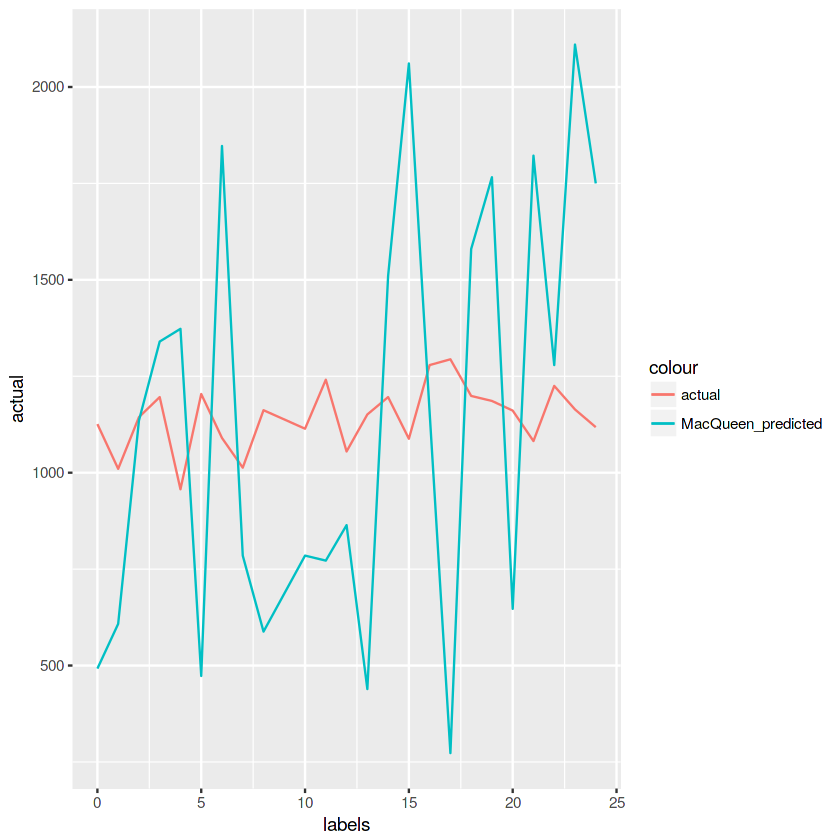

In [36]:
# Wykres zgodności algorytmu McQueen

ggplot(Act_Pred_df, aes(labels)) + 
    geom_line(aes(y = actual, colour = "actual")) + 
  geom_line(aes(y = predicted_MacQueen, colour = "MacQueen_predicted"))

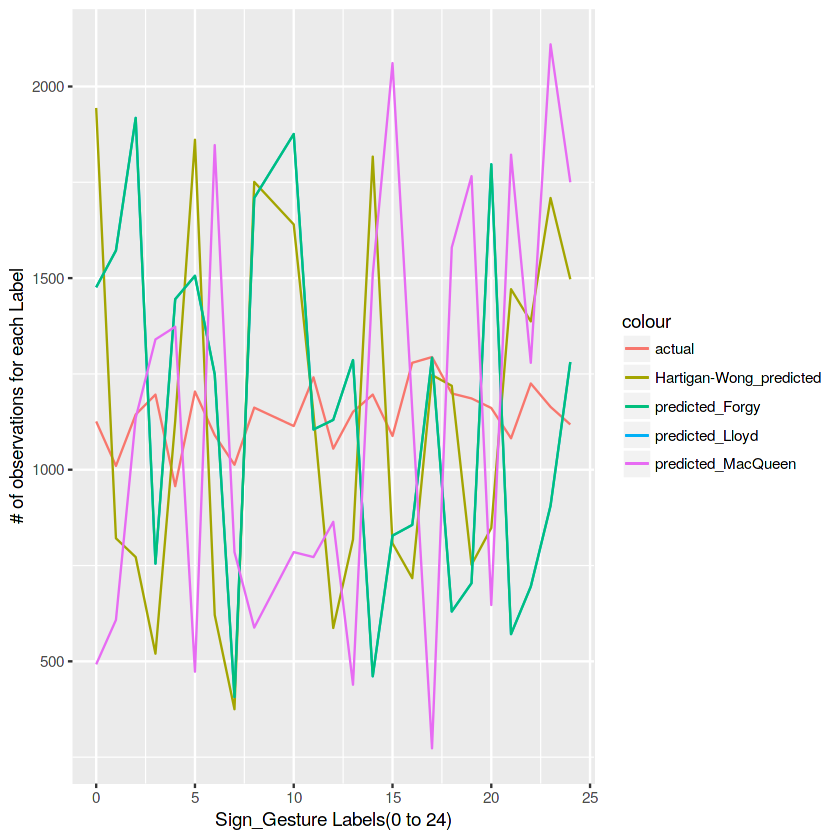

In [37]:
# Wykres porównujący algorytmy

par(mfrow=c(1,1)) 

ggplot(Act_Pred_df, aes(labels)) + 
    geom_line(aes(y = actual, colour = "actual")) + 
  geom_line(aes(y = predicted_hwong, colour = "Hartigan-Wong_predicted"))+
geom_line(aes(y = predicted_Lloyd, colour = "predicted_Lloyd"))+
geom_line(aes(y = predicted_Forgy, colour = "predicted_Forgy"))+
geom_line(aes(y = predicted_MacQueen, colour = "predicted_MacQueen"))+
 labs(x="Sign_Gesture Labels(0 to 24)", y= "# of observations for each Label")




# Between SS/Total SS dla algorytmu Hartgan-Wong wynosi 47.7%
# Between SS/Total SS dla algorytmu Lloyd wynosi 47.6%
# Between SS/Total SS dla algorytmu Forgy wynosi 47.9%
# Between SS/Total SS dla algorytmu MacQueen wynosi 47.6%